In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Qyelp = pd.read_json("C:/Users/justy/Documents/GitHub/inf553-adjusted-ratings/thousand.json")

In [7]:
Qyelp.head(5)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [13]:
print("Unique businesses: %d" % len(Qyelp['business_id'].unique()))
print("Unique users: %d" % len(Qyelp['user_id'].unique()))

Unique businesses: 972
Unique users: 188


In [53]:
DCount = Qyelp.groupby('user_id')['review_id'].count().to_dict()
DAvg = Qyelp.groupby('user_id')['stars'].mean().to_dict()
DMed = Qyelp.groupby('user_id')['stars'].median().to_dict()
DMin = Qyelp.groupby('user_id')['stars'].min().to_dict()
DMax = Qyelp.groupby('user_id')['stars'].max().to_dict()
DStd = Qyelp.groupby('user_id')['stars'].std().to_dict()

In [55]:
QDist = pd.DataFrame(Qyelp['user_id'].unique(), columns=['user_id'])
print('Number of Users: %d' % len(QDist))
QDist['Reviews'] = QDist['user_id'].map(DCount)
QDist['Mean'] = QDist['user_id'].map(DAvg)
QDist['Std Dev'] = QDist['user_id'].map(DStd)
QDist['Max'] = QDist['user_id'].map(DMax)
QDist['Median'] = QDist['user_id'].map(DMed)
QDist['Min'] = QDist['user_id'].map(DMin)

QDist.head(5)

Number of Users: 188


,user_id,Reviews,Mean,Std Dev,Max,Median,Min
0,msQe1u7Z_XuqjGoqhB0J5g,10,3.2,1.751190,5,3.0,1
1,TlvV-xJhmh7LCwJYXkV-cg,1,5.0,NaN,5,5.0,5
2,NhOc64RsrTT1Dls50yYW8g,2,3.0,2.828427,5,3.0,1
3,LKcdcMrq2xDzIThSHiZmLg,1,4.0,NaN,4,4.0,4
4,hxqo4NyJFfeOmuoVi--s1A,1,5.0,NaN,5,5.0,5


In [76]:
json = QDist.to_json("user_summary.json", orient='records')


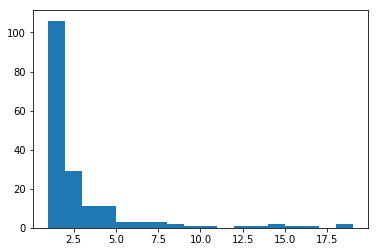

In [62]:
plt.hist(QDist['Reviews'], bins=np.arange(1,20,1))
plt.show()

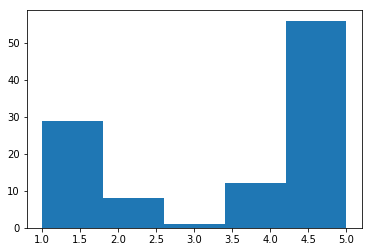

In [69]:
plt.hist(QDist[QDist['Reviews'] == 1]['Mean'], bins=5)
plt.show()

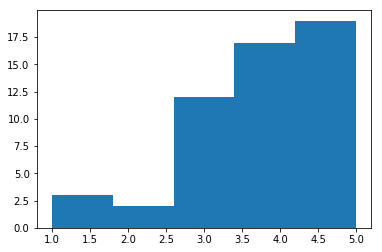

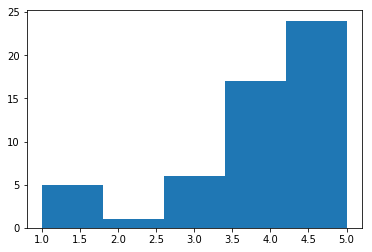

In [81]:
plt.hist(QDist[QDist['Reviews'] > 2]['Median'], bins=5)
plt.show()

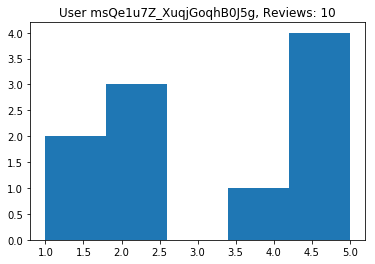

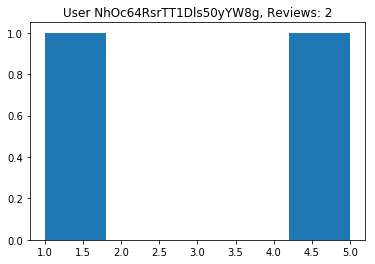

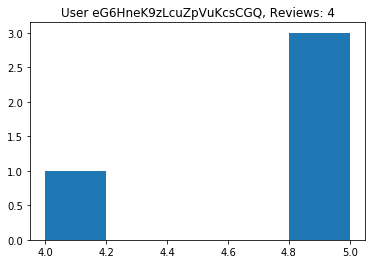

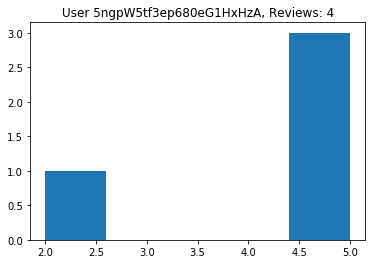

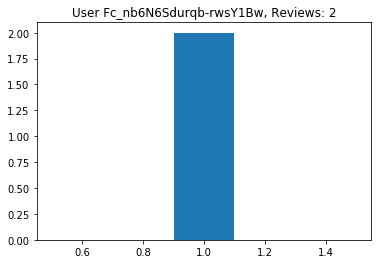

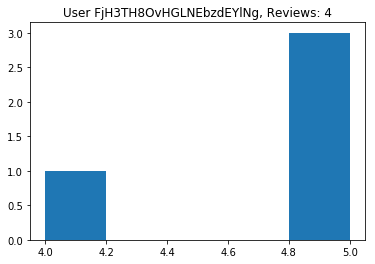

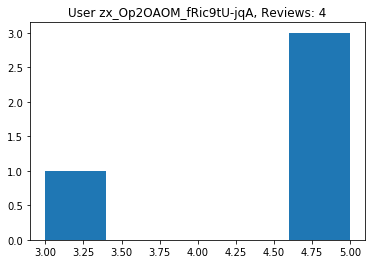

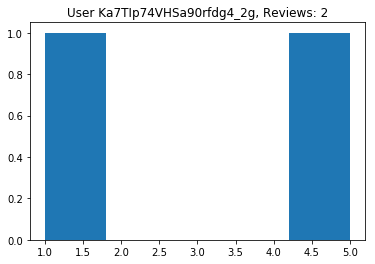

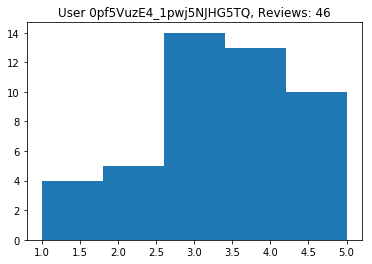

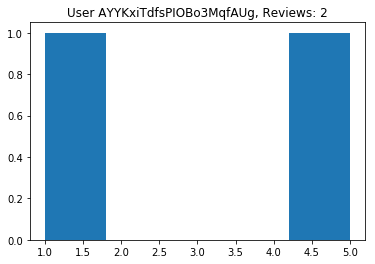

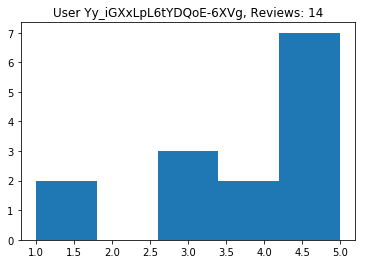

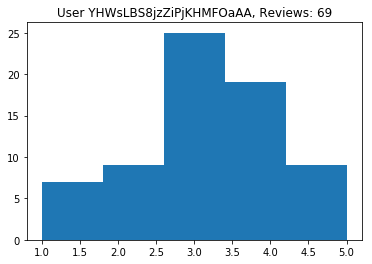

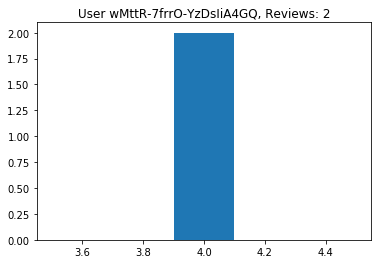

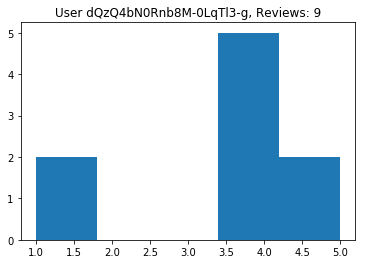

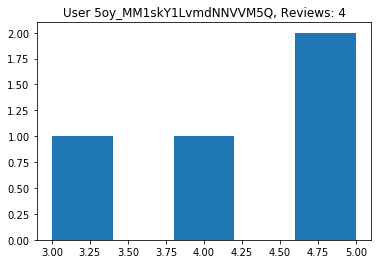

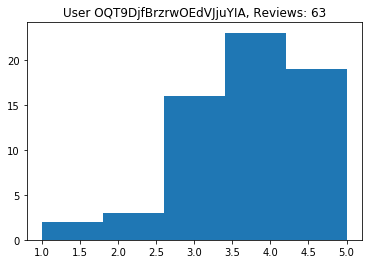

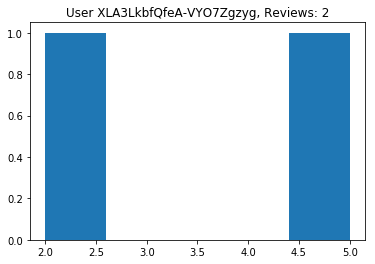

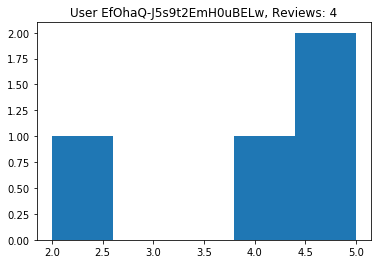

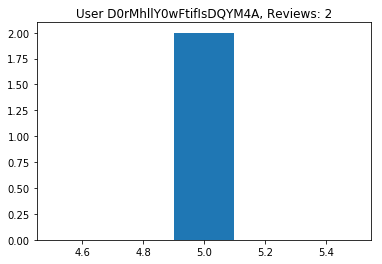

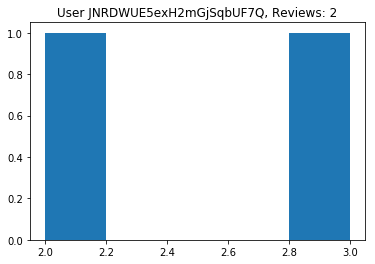

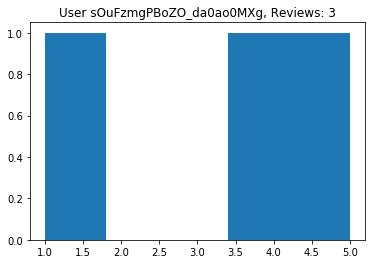

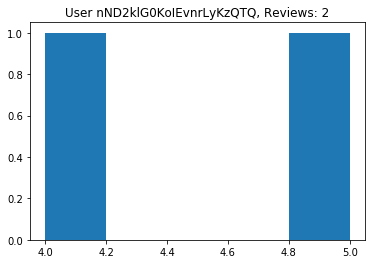

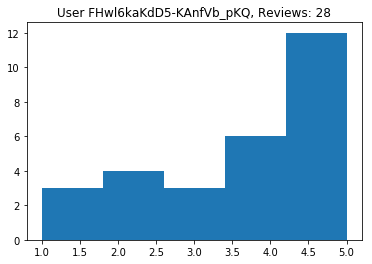

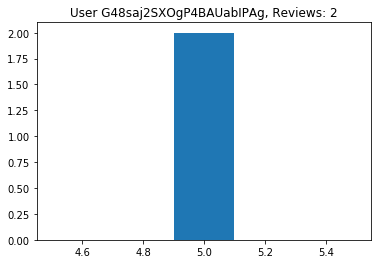

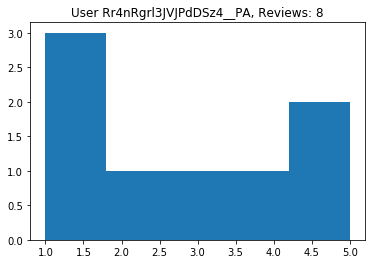

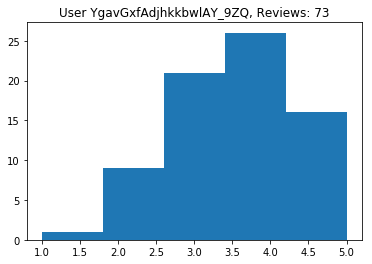

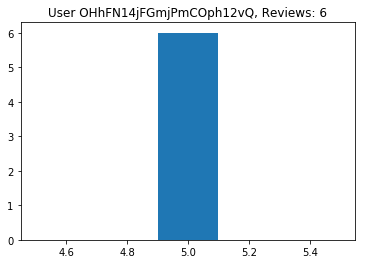

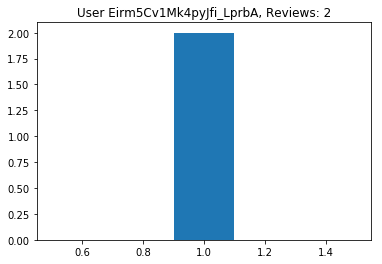

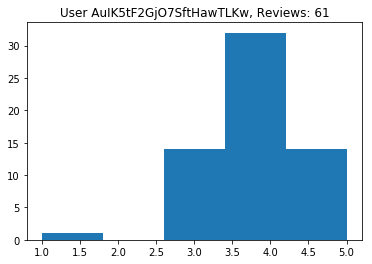

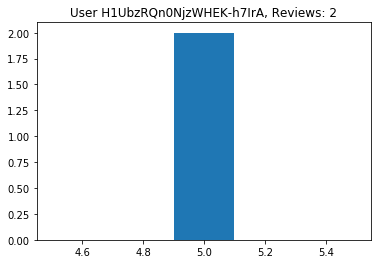

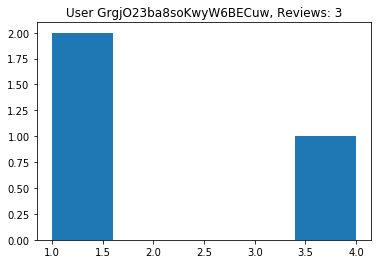

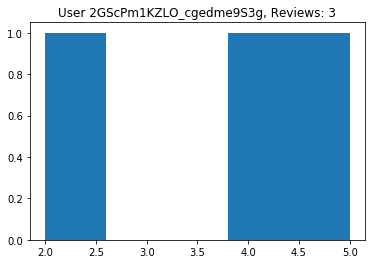

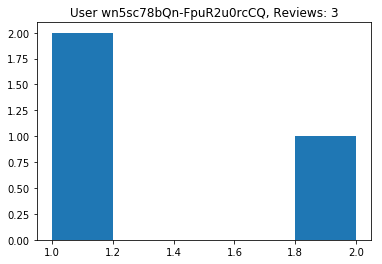

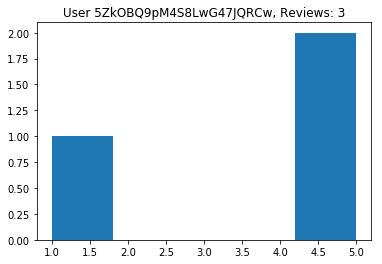

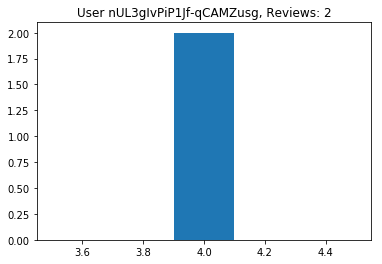

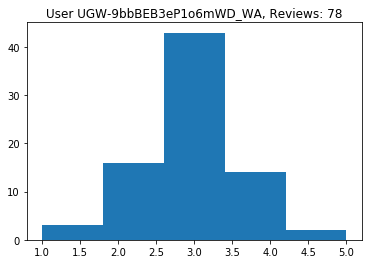

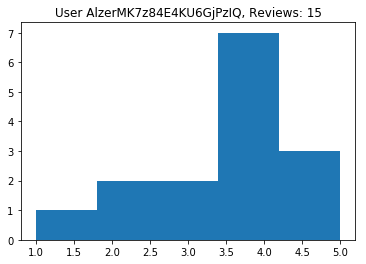

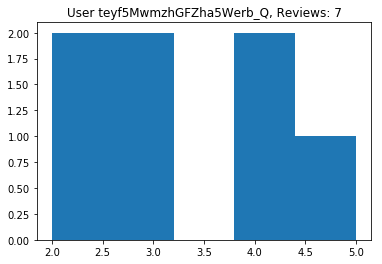

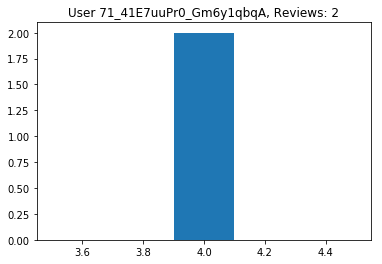

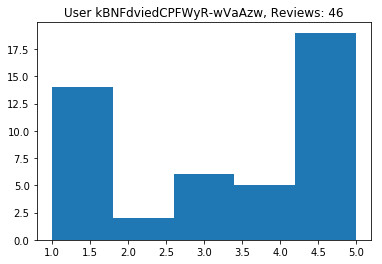

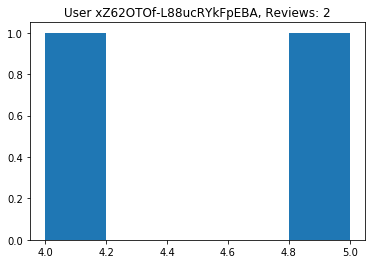

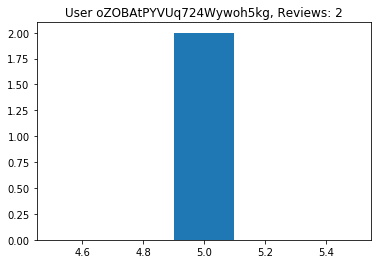

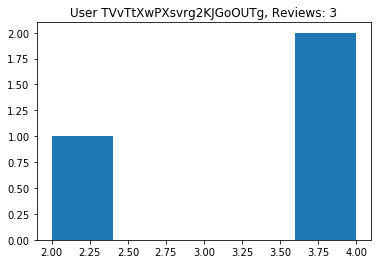

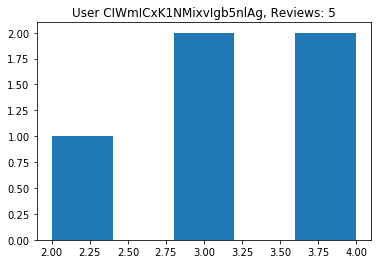

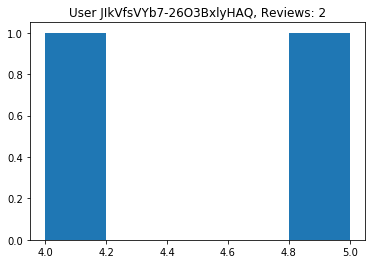

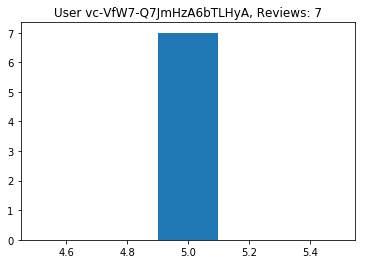

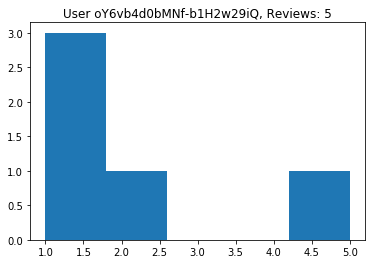

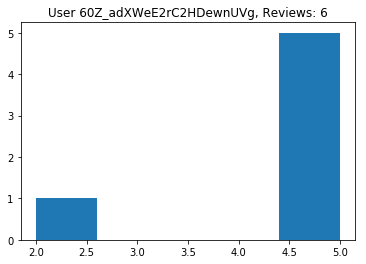

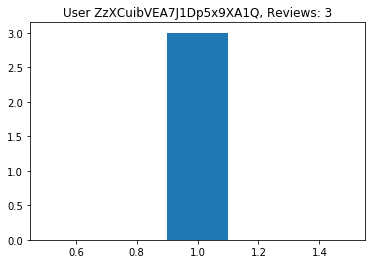

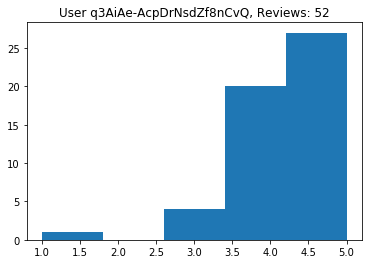

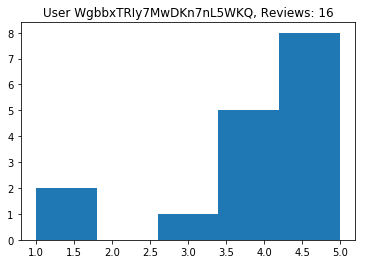

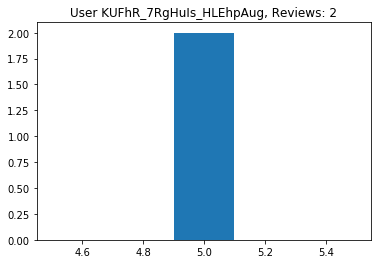

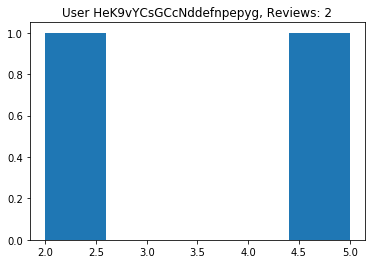

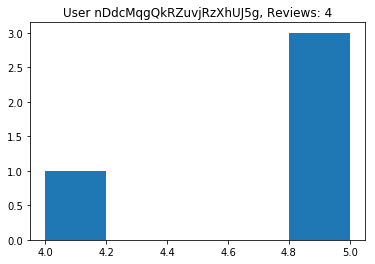

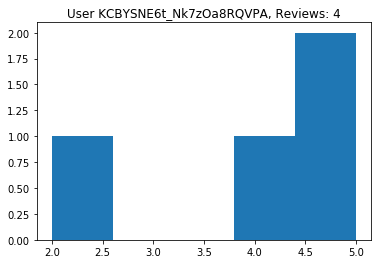

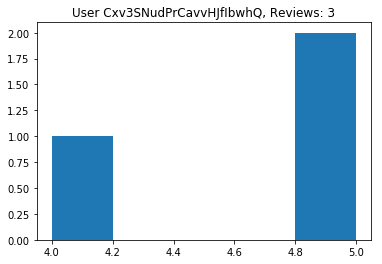

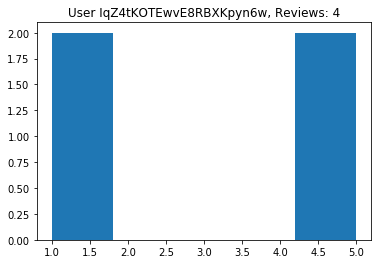

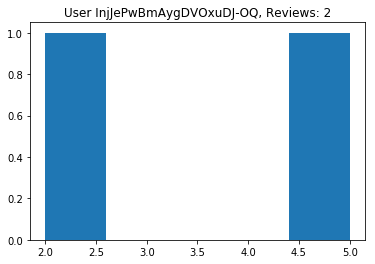

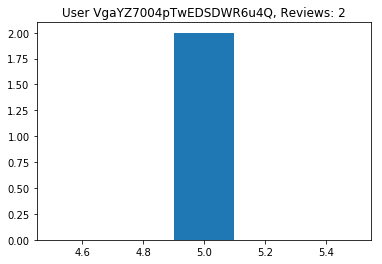

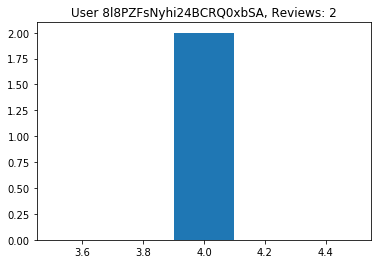

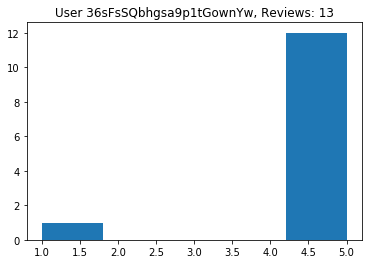

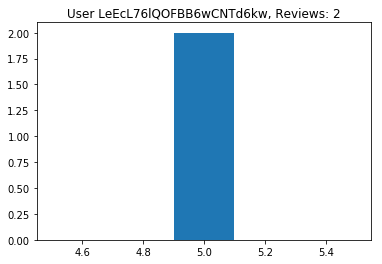

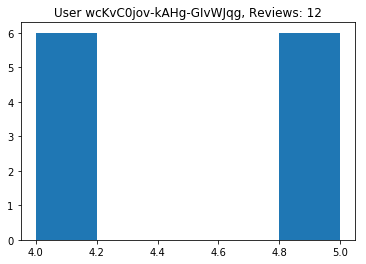

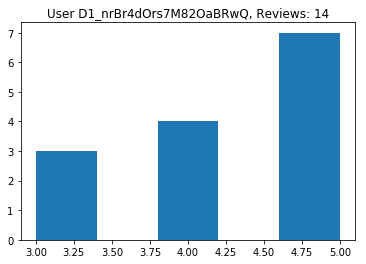

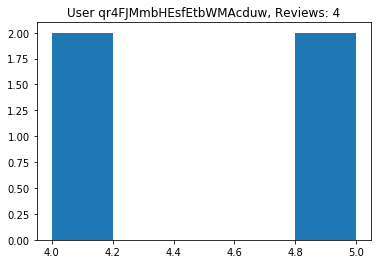

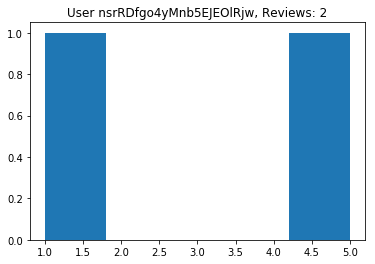

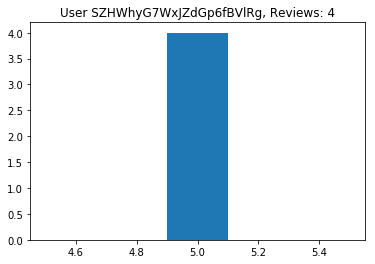

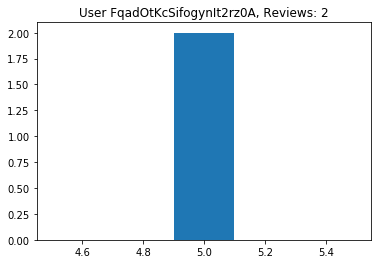

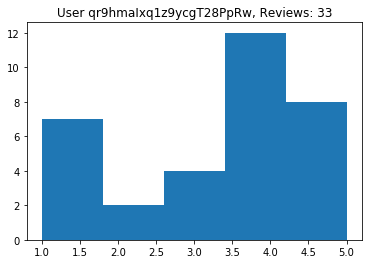

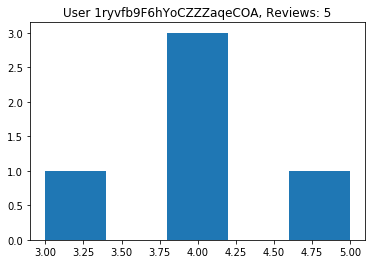

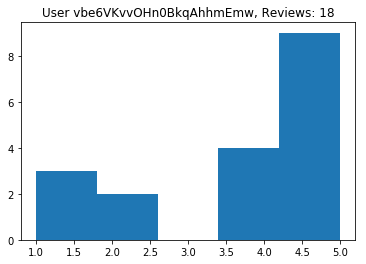

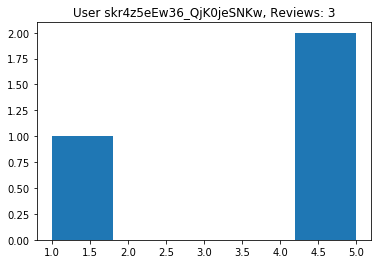

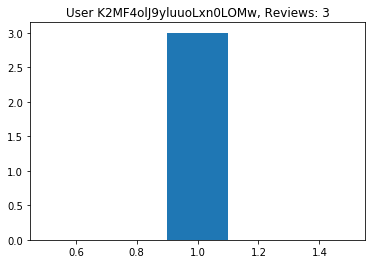

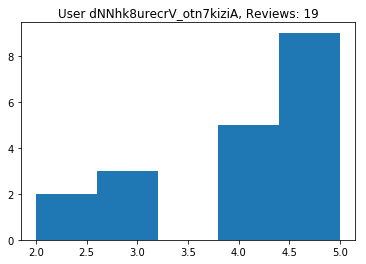

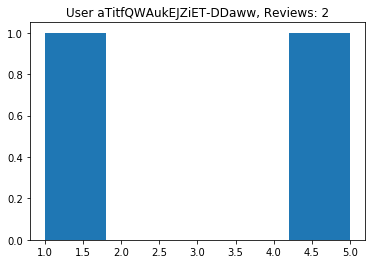

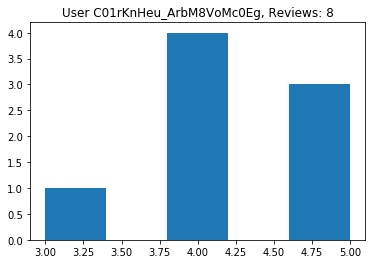

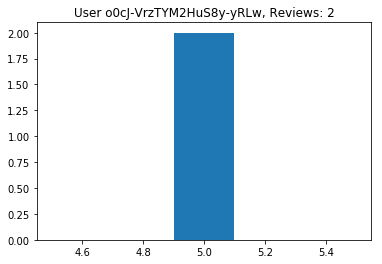

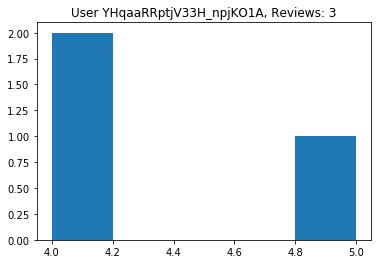

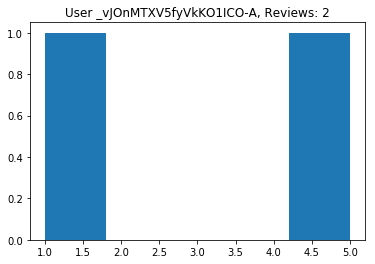

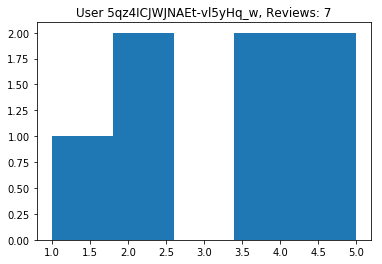

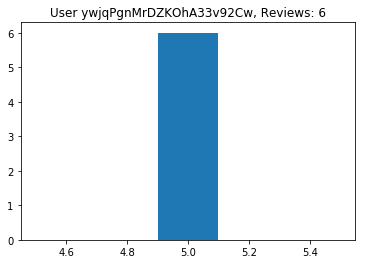

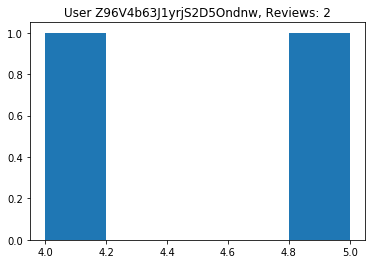

In [84]:
for user in QDist[QDist['Reviews']>1]['user_id']:
    plt.hist(Qyelp[Qyelp['user_id']==user]['stars'], bins=5)
    plt.title("User %s, Reviews: %d" % (user, QDist[QDist['user_id']==user]['Reviews']))
    plt.show()